### Sigmoid函数

In [2]:
import numpy as np
import matplotlib.pyplot as plt

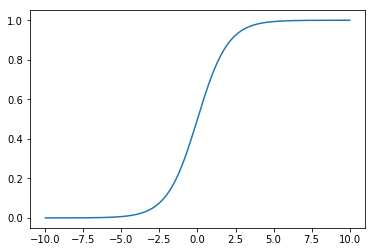

In [3]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

x = np.linspace(-10,10,10000)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

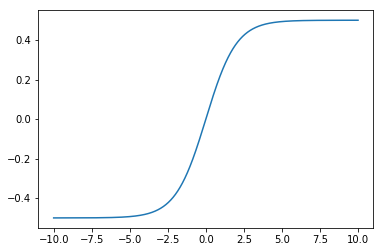

In [4]:
# demean
x_mean = np.mean(x)
y_mean = np.mean(y)

x2 = x-x_mean
y2 = y-y_mean
plt.plot(x2,y2)
plt.show()

![](http://p9tybni1b.bkt.clouddn.com/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92.png)

### 代价函数

![](http://p9tybni1b.bkt.clouddn.com/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E4%BB%A3%E4%BB%B7%E5%87%BD%E6%95%B0.png)

![](http://p9tybni1b.bkt.clouddn.com/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E4%BB%A3%E4%BB%B7%E5%87%BD%E6%95%B02.png)

In [3]:
from sklearn import datasets

In [10]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

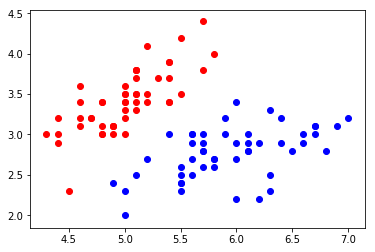

In [11]:
plt.scatter(x[y==0,0],x[y==0,1],color="r")
plt.scatter(x[y==1,0],x[y==1,1],color="b")
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x,y)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 在逻辑回归中使用多项式特征

In [13]:
import numpy as np
import matplotlib.pyplot as plt

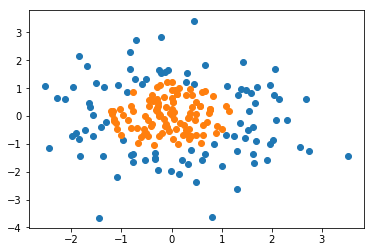

In [28]:
x = np.random.normal(0,1,size=(200,2))
y = np.array(x[:,0]**2+x[:,1]**2<1.5,dtype=np.int)
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(x)
x2 = poly.transform(x)
lr1 = LogisticRegression()
lr1.fit(x,y)
print(lr1.score(x,y))
lr2 = LogisticRegression()
lr2.fit(x2,y)
print(lr2.score(x2,y))

0.68
0.975


In [10]:
def plot_decision_boundary(model,axis):
    """决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
#         np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100).reshape(-1,1))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

### 正则化

![](http://p9tybni1b.bkt.clouddn.com/%E9%80%BB%E8%BE%91%E5%9B%9E%E5%BD%92%E6%AD%A3%E5%88%99%E5%8C%96.png)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.normal(0,1,size=(200,2))
y = np.array(x[:,0]**2+x[:,1]<1.5,dtype=np.int)
for _ in range(20):
    y[np.random.randint(200)] = 1

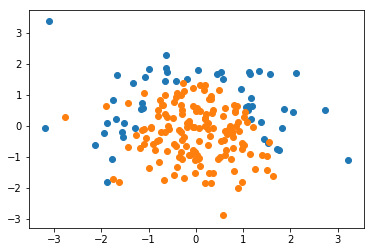

In [28]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


trainX,testX,trainY,testY = train_test_split(x,y)
log_reg = LogisticRegression()
log_reg.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print(log_reg.score(trainX,trainY))
print(log_reg.score(testX,testY))

0.82
0.8


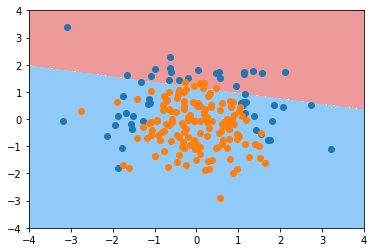

In [31]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [32]:
# 引用多项式项
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

0.9133333333333333
0.92


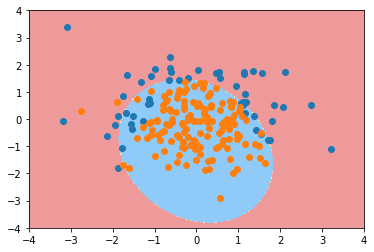

In [33]:
poly = PolynomialLogisticRegression(2)
poly.fit(trainX,trainY)
print(poly.score(trainX,trainY))
print(poly.score(testX,testY))
# 画图
plot_decision_boundary(poly,axis=[-4,4,-4,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

0.9133333333333333
0.92


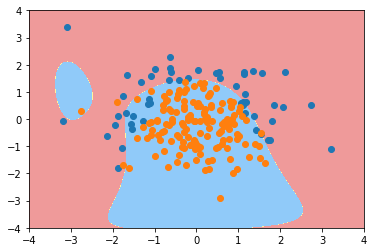

In [34]:
# 过拟合
poly2 = PolynomialLogisticRegression(20)
poly2.fit(trainX,trainY)
print(poly.score(trainX,trainY))
print(poly.score(testX,testY))
# 画图
plot_decision_boundary(poly2,axis=[-4,4,-4,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

In [35]:
def PolynomialLogisticRegression2(degree,C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C))
    ])

0.9133333333333333
0.92


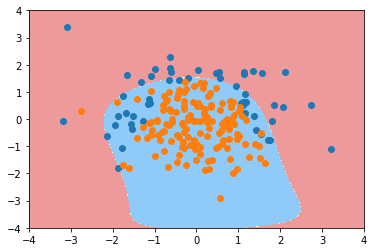

In [36]:
poly2 = PolynomialLogisticRegression2(20,0.1)
poly2.fit(trainX,trainY)
print(poly.score(trainX,trainY))
print(poly.score(testX,testY))
# 画图
plot_decision_boundary(poly2,axis=[-4,4,-4,4])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.show()

## 逻辑回归分类鸢尾花数据集

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


iris = datasets.load_iris()
x = iris.data
y = iris.target

In [5]:
trainX,testX,trainY,testY = train_test_split(x,y)

In [9]:
# OVR
log_reg = LogisticRegression()
log_reg.fit(trainX,trainY)
log_reg.score(testX,testY)

0.8947368421052632

In [10]:
# OVO
log_reg = LogisticRegression(multi_class="multinomial",solver="newton-cg")
log_reg.fit(trainX,trainY)
log_reg.score(testX,testY)

0.9473684210526315

In [23]:
def plot_decision_boundary(model,axis):
    """决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
#         np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100).reshape(-1,1))
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

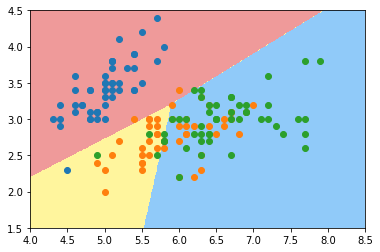

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# OVR
x = iris.data[:,:2]
lr = LogisticRegression()
lr.fit(x,y)

# 画图
plot_decision_boundary(lr,axis=[4,8.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()

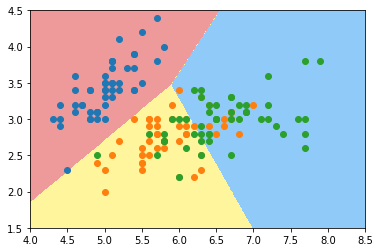

In [25]:
# OVO
x = iris.data[:,:2]
lr = LogisticRegression(multi_class="multinomial",solver="newton-cg")
lr.fit(x,y)

# 画图
plot_decision_boundary(lr,axis=[4,8.5,1.5,4.5])
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])
plt.scatter(x[y==2,0],x[y==2,1])
plt.show()